## Telecom X - Análisis de Evasión de Clientes ##
### Paula Bustos ###
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## #📌 Extracción ##

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

📌 Enlace de la API:
🔗 challenge2-data-science-LATAM/TelecomX_Data.json at main · ingridcristh/challenge2-data-science-LATAM

🔗GitHub - ingridcristh/challenge2-data-science-LATAM

¿Qué debes hacer?
✅ Cargar los datos directamente desde la API utilizando Python.
✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

Este es el primer paso para transformar los datos en información valiosa. ¿Listo para programar? 🚀

In [139]:
!pip install pyarrow
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [140]:
import pandas as pd
import numpy as np
import requests
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

raw_data = requests.get(url).json()
raw_data

[{'customerID': '0002-ORFBO',
  'Churn': 'No',
  'customer': {'gender': 'Female',
   'SeniorCitizen': 0,
   'Partner': 'Yes',
   'Dependents': 'Yes',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'No'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'Yes',
   'DeviceProtection': 'No',
   'TechSupport': 'Yes',
   'StreamingTV': 'Yes',
   'StreamingMovies': 'No'},
  'account': {'Contract': 'One year',
   'PaperlessBilling': 'Yes',
   'PaymentMethod': 'Mailed check',
   'Charges': {'Monthly': 65.6, 'Total': '593.3'}}},
 {'customerID': '0003-MKNFE',
  'Churn': 'No',
  'customer': {'gender': 'Male',
   'SeniorCitizen': 0,
   'Partner': 'No',
   'Dependents': 'No',
   'tenure': 9},
  'phone': {'PhoneService': 'Yes', 'MultipleLines': 'Yes'},
  'internet': {'InternetService': 'DSL',
   'OnlineSecurity': 'No',
   'OnlineBackup': 'No',
   'DeviceProtection': 'No',
   'TechSupport': 'No',
   'StreamingTV': 'No',
   'StreamingMovies': 

In [161]:
data = pd.json_normalize(raw_data)
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


## #🔧 Transformación ##

Ahora que has extraído los datos, es fundamental comprender la estructura del dataset y el significado de sus columnas. Esta etapa te ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes.

📌 Para facilitar este proceso, hemos creado un diccionario de datos con la descripción de cada columna. Aunque no es obligatorio utilizarlo, puede ayudarte a comprender mejor la información disponible.

🔗 [Enlace al diccionario y a la API](https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_diccionario.md)

¿Qué debes hacer?
- ✅ Explorar las columnas del dataset y verificar sus tipos de datos.
- ✅ Consultar el diccionario para comprender mejor el significado de las variables.
- ✅ Identificar las columnas más relevantes para el análisis de evasión.

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [163]:
dictionary = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_diccionario.md')
Markdown(dictionary.text)

#### Diccionario de datos

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

In [164]:
#Identificar valores únicos en cada columna
for col in data.columns:
    if data[col].dtype == 'object' and col != 'customerID':
        print(data[col].value_counts())
        print("\n")

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


customer.gender
Male      3675
Female    3592
Name: count, dtype: int64


customer.Partner
No     3749
Yes    3518
Name: count, dtype: int64


customer.Dependents
No     5086
Yes    2181
Name: count, dtype: int64


phone.PhoneService
Yes    6560
No      707
Name: count, dtype: int64


phone.MultipleLines
No                  3495
Yes                 3065
No phone service     707
Name: count, dtype: int64


internet.InternetService
Fiber optic    3198
DSL            2488
No             1581
Name: count, dtype: int64


internet.OnlineSecurity
No                     3608
Yes                    2078
No internet service    1581
Name: count, dtype: int64


internet.OnlineBackup
No                     3182
Yes                    2504
No internet service    1581
Name: count, dtype: int64


internet.DeviceProtection
No                     3195
Yes                    2491
No internet service    1581
Name: count, dtype: int64




Valores que deberían de haber en cada columna:
- customerID: diferentes valores
- Churn: dos valores
- gender: dos valores
- SeniorCitizen: dos valores
- Partner: dos valores
- Dependents: dos valores
- tenure: diferentes valores
- PhoneService: dos valores
- MultipleLines: tres valores
- InternetService: tres valores
- OnlineSecurity: tres valores
- OnlineBackup: tres valores
- DeviceProtection: tres valores
- TechSupport: tres valores
- StreamingTV: tres valores
- StreamingMovies: tres valores
- Contract: tres valores
- PaperlessBilling: dos valores
- PaymentMethod: cuatro valores
- Charges.Monthly: diferentes valores
- Charges.Total: diferentes valores

In [165]:
#Identificar valores únicos en cada columna
for col in data.columns:
    if data[col].dtype == 'object':
        num_unicos = data[col].nunique()
        print(f"{col}: {num_unicos} valores únicos")

customerID: 7267 valores únicos
Churn: 3 valores únicos
customer.gender: 2 valores únicos
customer.Partner: 2 valores únicos
customer.Dependents: 2 valores únicos
phone.PhoneService: 2 valores únicos
phone.MultipleLines: 3 valores únicos
internet.InternetService: 3 valores únicos
internet.OnlineSecurity: 3 valores únicos
internet.OnlineBackup: 3 valores únicos
internet.DeviceProtection: 3 valores únicos
internet.TechSupport: 3 valores únicos
internet.StreamingTV: 3 valores únicos
internet.StreamingMovies: 3 valores únicos
account.Contract: 3 valores únicos
account.PaperlessBilling: 2 valores únicos
account.PaymentMethod: 4 valores únicos
account.Charges.Total: 6531 valores únicos


Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [166]:
# Corrección del tipo de dato en la columna charges.total, se cambia de object a float
data['account.Charges.Total'] = pd.to_numeric(data['account.Charges.Total'], errors='coerce')
data['account.Charges.Total'].dtype

dtype('float64')

In [167]:
# Detectar valores nulos
data.isnull().sum()

customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

In [168]:
# Detectar valores duplicados
data.duplicated().sum()

0

In [169]:
#Eliminar valores nulos
data = data.dropna()

In [170]:
#Correción de la columna Churn, solo debe de tener dos valores
print(data['Churn'].value_counts())
data = data[data['Churn'] != '']
print(data['Churn'].value_counts())

Churn
No     5163
Yes    1869
        224
Name: count, dtype: int64
Churn
No     5163
Yes    1869
Name: count, dtype: int64


Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas.

In [171]:
data['Cuentas_Diarias'] = data['account.Charges.Monthly'] / 30
data

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


La estandarización y transformación de datos es una etapa opcional, pero altamente recomendada, ya que busca hacer que la información sea más consistente, comprensible y adecuada para el análisis. Durante esta fase, por ejemplo, puedes convertir valores textuales como "Sí" y "No" en valores binarios (1 y 0), lo que facilita el procesamiento matemático y la aplicación de modelos analíticos.

Además, traducir o renombrar columnas y datos hace que la información sea más accesible y fácil de entender, especialmente cuando se trabaja con fuentes externas o términos técnicos. Aunque no es un paso obligatorio, puede mejorar significativamente la claridad y comunicación de los resultados, facilitando la interpretación y evitando confusiones, especialmente al compartir información con stakeholders no técnicos.

In [172]:
#Cambio nombre de columnes
nuevos_nombres = {
    'Churn': 'Left_company',
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Have_partner',
    'customer.Dependents': 'Have_dependents',
    'customer.tenure': 'Months_contract',
    'phone.PhoneService': 'Phone_Service',
    'phone.MultipleLines': 'Multiple_Lines',
    'internet.InternetService': 'Internet_Service',
    'internet.OnlineSecurity': 'Online_Security',
    'internet.OnlineBackup': 'Online_Backup',
    'internet.DeviceProtection': 'Device_Protection',
    'internet.TechSupport': 'Tech_Support',
    'internet.StreamingTV': 'TV_Streaming',
    'internet.StreamingMovies': 'Streaming_Movies',
    'account.Contract': 'Contract_type',
    'account.PaperlessBilling': 'Digital_billing',
    'account.PaymentMethod': 'Payment_Method',
    'account.Charges.Monthly': 'Monthly_charges',
    'account.Charges.Total': 'Total_charges'
}

data = data.rename(columns=nuevos_nombres)

In [174]:
# Cambio de valores "Sí" y "No", por valores 1 y 0
valores = {
    'Yes': 1, 
    'No': 0,
    'No phone service': 0,
    'No internet service': 0
}

data = data.replace(valores)

C:\Users\paula\AppData\Local\Temp\ipykernel_7952\7447264.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(valores)


In [155]:
data_copy = data

#📊 Carga y análisis

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [156]:
data.describe()

,Left_company,SeniorCitizen,Have_partner,Have_dependents,Months_contract,Phone_Service,Multiple_Lines,Digital_billing,Monthly_charges,Total_charges,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

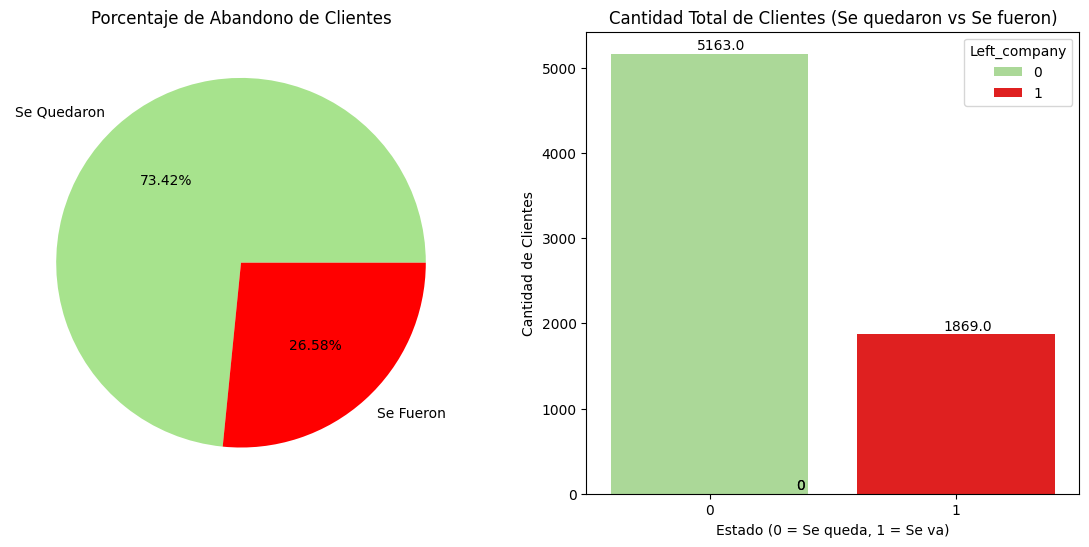

In [157]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
conteo = data['Left_company'].value_counts()
plt.pie(conteo, 
        labels=['Se Quedaron', 'Se Fueron'], 
        autopct='%1.2f%%',
        colors=['#A7E38D','#FF0000'])
plt.title('Porcentaje de Abandono de Clientes')


plt.subplot(1, 2, 2)
ax = sns.countplot(x='Left_company', hue='Left_company', data=data, palette=['#A7E38D','#FF0000'])
plt.title('Cantidad Total de Clientes (Se quedaron vs Se fueron)')
plt.xlabel('Estado (0 = Se queda, 1 = Se va)')
plt.ylabel('Cantidad de Clientes')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.35, p.get_height() + 50))

plt.show()

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [175]:
variables = ['Gender',
            'SeniorCitizen',
            'Have_partner',
            'Have_dependents',
            'Phone_Service',
            'Multiple_Lines',
            'Internet_Service',
            'Online_Security',
            'Online_Backup',
            'Device_Protection',
            'Tech_Support',
            'Contract_type',
            'Digital_billing',
            'Payment_Method'
            ]

for col in variables:
    print(f"================ {col.upper()} ================")
    
    tabla = pd.crosstab(data[col], data['Left_company'], normalize='index') * 100
    tabla = tabla.sort_values(by=1, ascending=False)
    tabla = tabla.round(2).astype(str) + '%'
    
    print(tabla)
    print("\n")

================ GENDER ================
Left_company       0       1
Gender                      
Female        73.04%  26.96%
Male           73.8%   26.2%


================ SENIORCITIZEN ================
Left_company        0       1
SeniorCitizen                
1              58.32%  41.68%
0              76.35%  23.65%


================ HAVE_PARTNER ================
Left_company       0       1
Have_partner                
0             67.02%  32.98%
1             80.28%  19.72%


================ HAVE_DEPENDENTS ================
Left_company          0       1
Have_dependents                
0                68.72%  31.28%
1                84.47%  15.53%


================ PHONE_SERVICE ================
Left_company        0       1
Phone_Service                
1              73.25%  26.75%
0               75.0%   25.0%


================ MULTIPLE_LINES ================
Left_company         0       1
Multiple_Lines                
1               71.35%  28.65%
0             

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

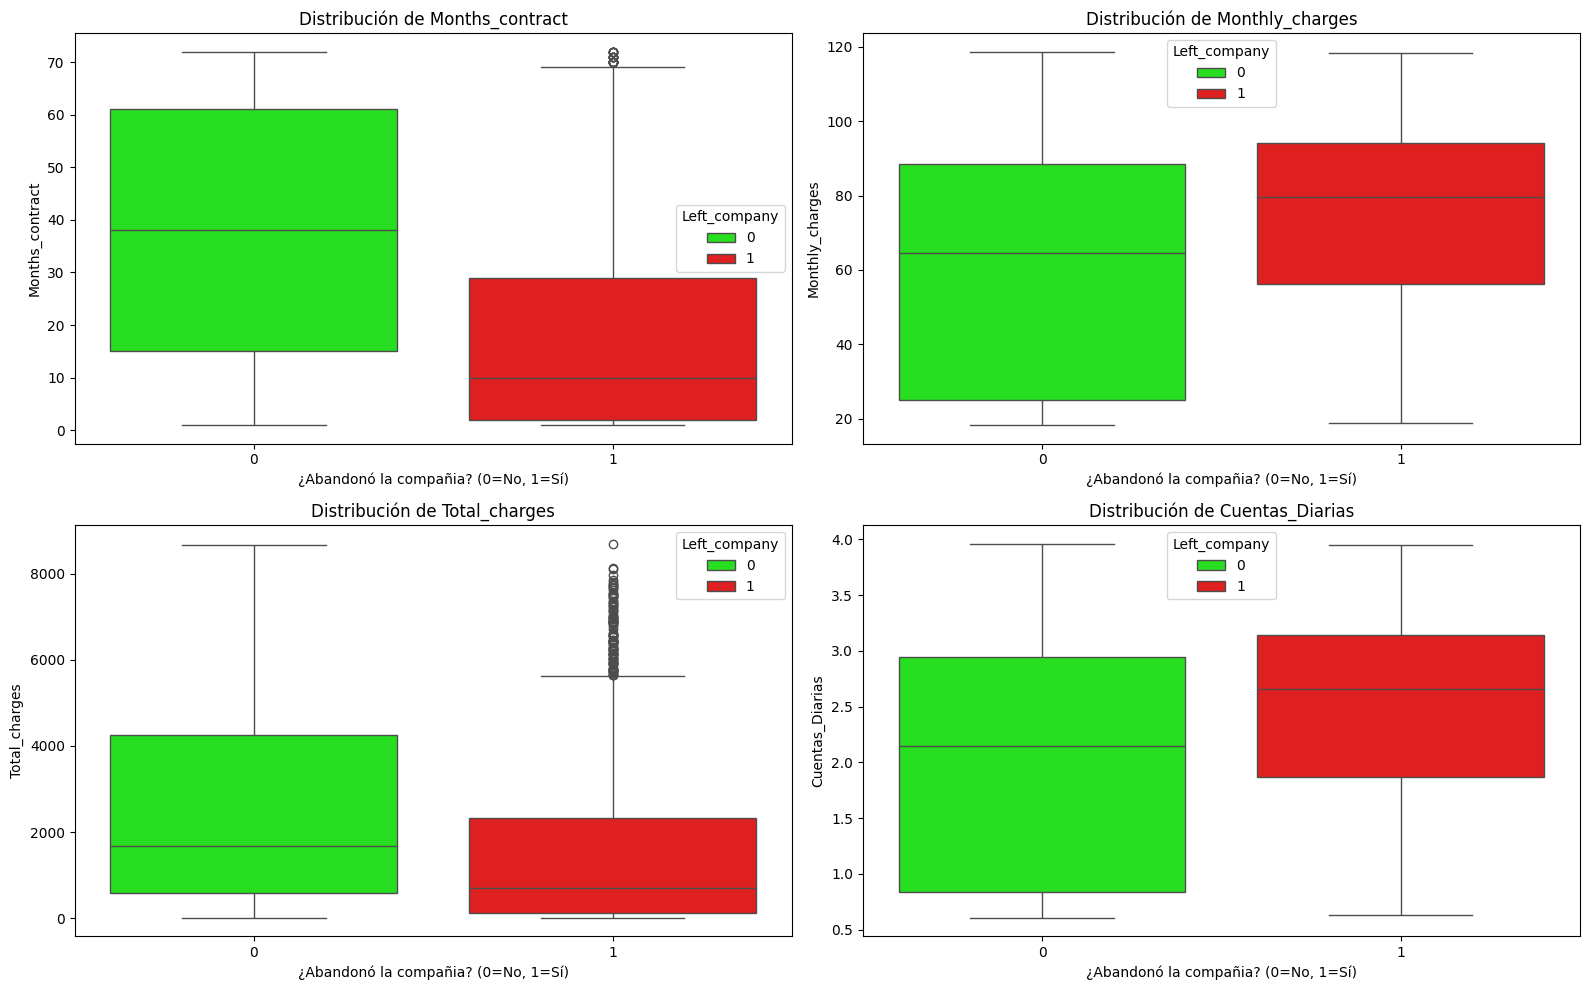

In [159]:
cols_numericas = ['Months_contract', 'Monthly_charges', 'Total_charges', 'Cuentas_Diarias']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

for i, col in enumerate(cols_numericas):
    fila = i // 2
    columna = i % 2

    sns.boxplot(x='Left_company', 
                y=col, 
                hue ='Left_company',
                data=data, 
                ax=axes[fila, columna],
                palette=['#09FF00','#FF0000'])
    
    axes[fila, columna].set_title(f'Distribución de {col}')
    axes[fila, columna].set_xlabel('¿Abandonó la compañia? (0=No, 1=Sí)')

plt.tight_layout()
plt.show()

## #📄Informe final ##

Finaliza el desafío elaborando un informe dentro del mismo notebook que resuma todo el trabajo realizado. El informe debe incluir:

🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).

🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.

🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.

🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.

🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.

Asegúrate de que el informe esté bien estructurado, claro y respaldado por visualizaciones que refuercen tus conclusiones. 🚀

Introducción

El objetivo principal de este análisis es determinar las causas raíz del abandono de clientes en la compañía Telecom X. Buscamos identificar patrones de comportamiento y factores de riesgo que nos permitan predecir la evasión. La finalidad última es proporcionar insights accionables para desarrollar estrategias de retención efectivas y reducir la pérdida de ingresos.

Limpieza y Tratamiento de Datos
Para garantizar la fiabilidad del análisis, se llevó a cabo un riguroso proceso de ingeniería de datos:
- Se extrajeron los datos en formato JSON crudo mediante peticiones HTTP (requests). Dado que la estructura original contenía datos anidados, se aplicó una técnica de normalización para aplanar la estructura, convirtiendo claves como customer.gender o account.Contract en columnas individuales operables.
- Se identificó una inconsistencia en la variable Charges.Total, la cual estaba formateada como texto debido a espacios vacíos. Se realizó la conversión a tipo numérico float y se imputaron los valores nulos.
- Se detectaron y eliminaron registros con valores vacíos en la variable objetivo Churn.
- Se estandarizaron las variables categóricas binarias Sí/No a valores numéricos 1/0 para facilitar el análisis estadístico.
- Se tradujeron y renombraron las columnas para mejorar la interpretabilidad del negocio.
- Se creó una nueva variable, Cuentas_Diarias, calculada a partir de la facturación mensual, para analizar el impacto del costo diario en la decisión del cliente.

Análisis Exploratorio de Datos
Se realizó un análisis descriptivo y visual para entender la distribución de los datos:
- Se calcularon estadísticas centrales para detectar valores atípicos.
- A través de gráficos de pastel y barras, se determinó que la tasa de abandono global es del 26.58% equivalente a aprox. 1,869 clientes de la muestra, una cifra significativa que evidencia oportunidades de mejora.
- Se utilizaron tablas cruzadas crosstab para comparar la tasa de fuga entre diferentes segmentos.
- Se emplearon diagramas de caja Boxplots para correlacionar variables continuas con la decisión de abandonar la empresa.

Conclusiones e Insights
Tras el análisis, se han detectado los siguientes patrones críticos de comportamiento:
- Factores Demográficos:
    - El 41.68% de los clientes clasificados como Senior Citizen abandonan la compañía. Esto sugiere una posible barrera tecnológica o insatisfacción con el soporte técnico para este grupo etario.
    - No existe diferencia significativa entre hombres y mujeres; ambos presentan una tasa de abandono cercana al 26%. El género no es un factor predictor.
- Factores Contractuales y de Pago:
    - Los clientes con contrato Month-to-month son los más propensos a irse. Al no tener un compromiso a largo plazo, la barrera de salida es mínima.
    - Los usuarios que pagan mediante pago Electrónico presentan la tasa de fuga más alta. Esto puede deberse a la facilidad operativa para cancelar este método o a un perfil de cliente menos bancarizado o automatizado.
- Factores Numéricos:
    - Existe una clara relación inversa. Los clientes que se van suelen tener muy poca antigüedad, la mediana es baja, a menudo menos de 10-15 meses. Los clientes que superan el primer año tienden a fidelizarse.
    - Los clientes que abandonan suelen tener, en promedio, facturas mensuales más altas que los que se quedan. Esto indica una sensibilidad al precio, si el servicio es caro y no perciben valor, se van.

Recomendaciones Estratégicas
Basado en los datos, se sugieren las siguientes acciones para reducir la evasión:
- Dado que la mayor fuga ocurre en los primeros meses, se recomienda implementar un programa durante los primeros 90 días, con seguimiento personalizado para asegurar que el cliente entienda y use el servicio.
- Incentivar a los clientes de Month-to-month a pasar a contratos de 1 o 2 años ofreciendo descuentos en la tarifa mensual o meses gratis. Asegurar al cliente por más tiempo reduce drásticamente el riesgo de fuga.
- Crear un canal de soporte técnico simplificado o planes específicos para Adultos Mayores, enfocados en la facilidad de uso, para reducir el 41% de abandono en este segmento.
- Dado que los clientes con facturas altas tienden a irse, se debe revisar si el precio de los servicios premium como Fibra Óptica o TV está alineado con el mercado o si se deben ofrecer paquetes que den mayor percepción de valor por el dinero.
- Promover el cambio de pago Electrónico a Tarjeta de Crédito o Débito Automático ofreciendo un pequeño descuento por suscripción automática. Esto crea una barrera de salida administrativa y reduce la fricción de pago mensual.